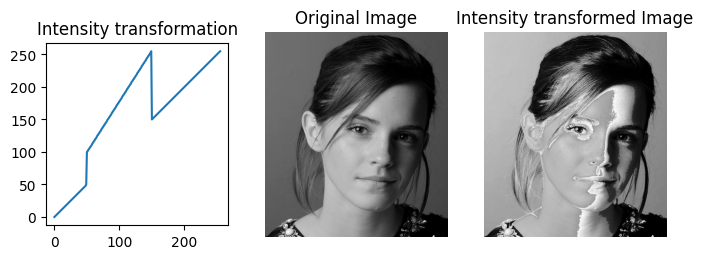

In [17]:
#Question 01
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_orig = cv.imread("emma.jpg", cv.IMREAD_GRAYSCALE)
assert img_orig is not None
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
assert len(t)==256
image_transformed = cv.LUT(img_orig, t)

fig, ax = plt.subplots(1, 3, figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed Image")
plt.show()


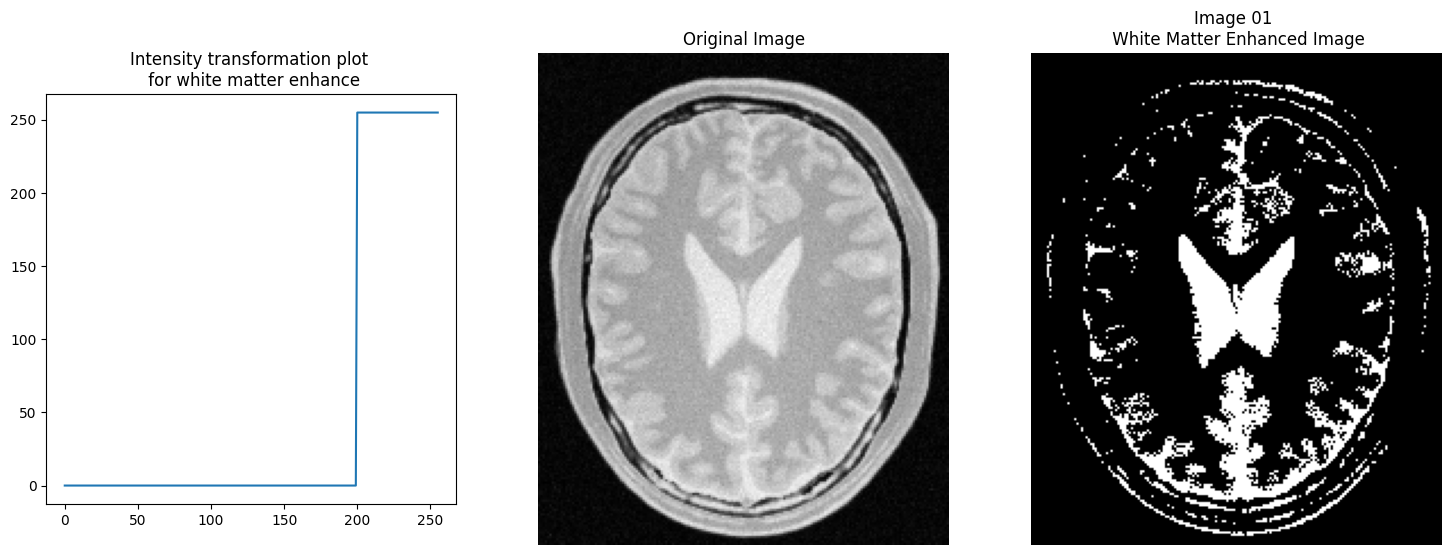

In [18]:
#Question 02 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_orig = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert img_orig is not None
t1 = np.zeros(200)
t2 = 255*np.ones(56)
t = np.concatenate((t1,t2),axis=0).astype(np.uint8)

img_white_matter = cv.LUT(img_orig,t)

fig, ax = plt.subplots(1,3,figsize=(18,18))
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation plot \n for white matter enhance")
ax[1].imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(img_white_matter,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Image 01 \n White Matter Enhanced Image")
plt.show()

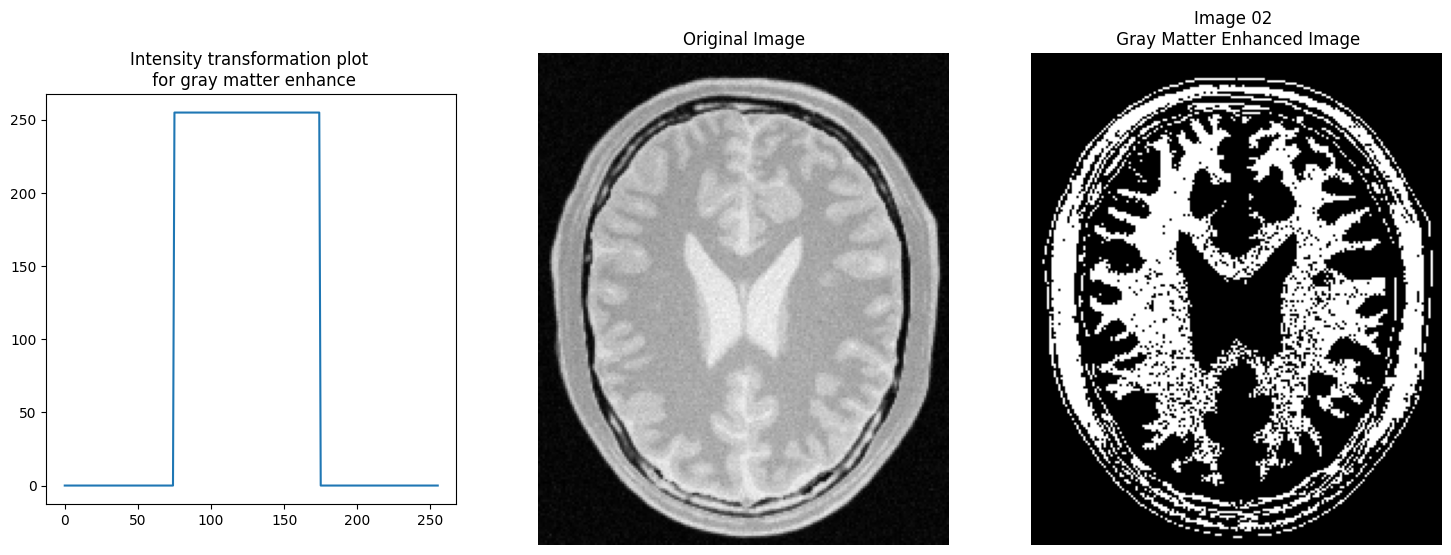

In [19]:
#Question 02 (b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_orig = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert img_orig is not None
s1 = np.zeros(75)
s2 = 255*np.ones(100)
s3 = np.zeros(81)
s = np.concatenate((s1,s2,s3),axis=0).astype(np.uint8)
assert len(s)==256

img_gray_matter = cv.LUT(img_orig,s)

fig, ax = plt.subplots(1,3,figsize=(18,18))
ax[0].plot(s), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation plot \n for gray matter enhance")
ax[1].imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(img_gray_matter,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Image 02 \n Gray Matter Enhanced Image")
plt.show()


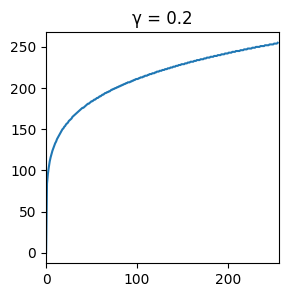

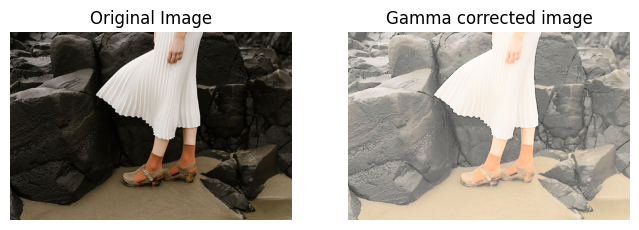

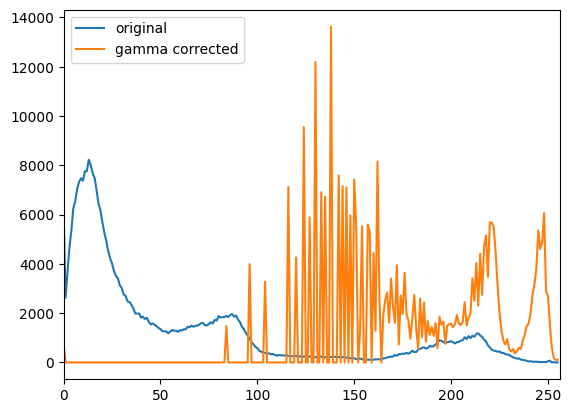

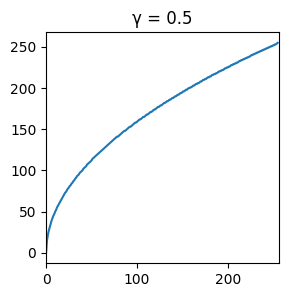

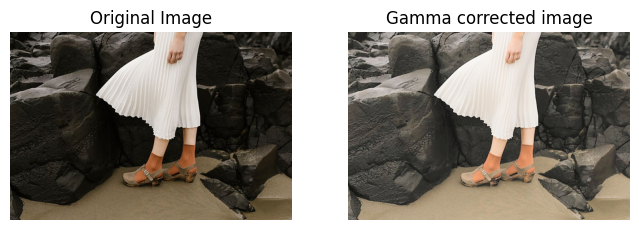

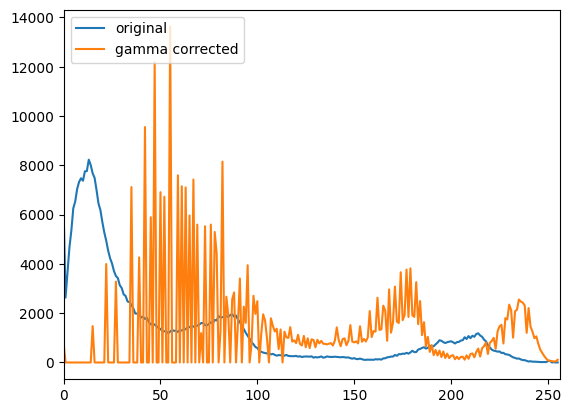

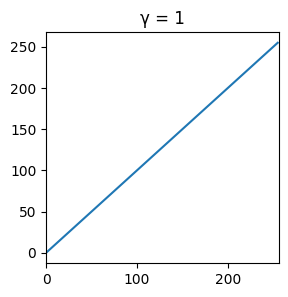

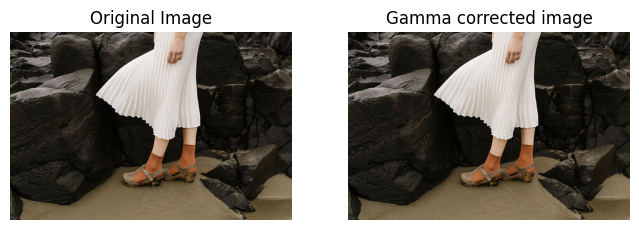

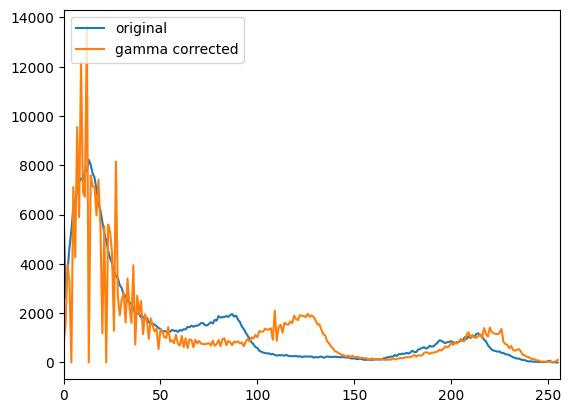

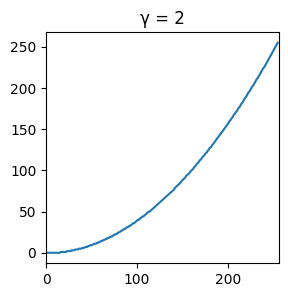

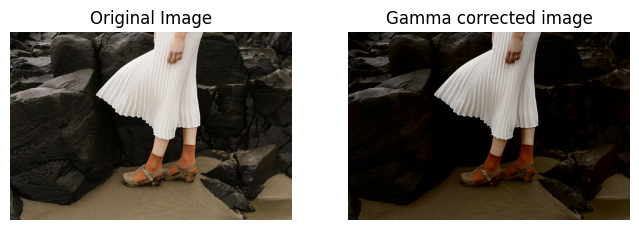

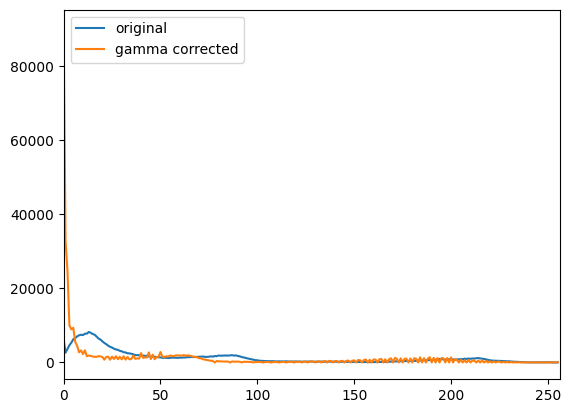

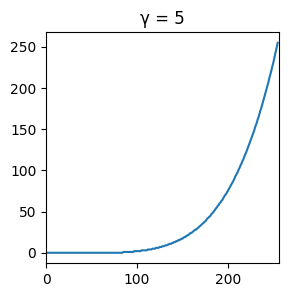

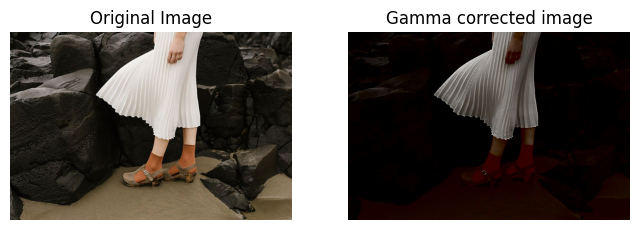

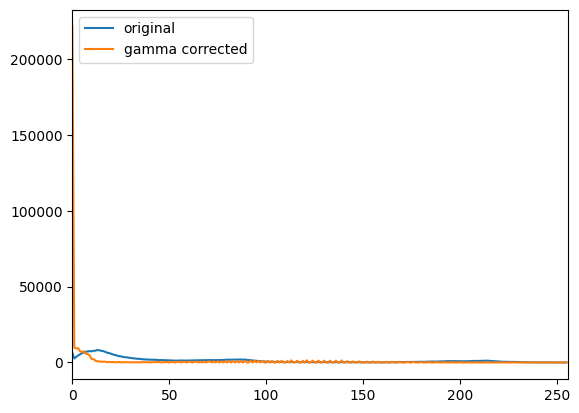

In [20]:
#Question 03 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.2, 0.5, 1, 2, 5]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(L,t)

    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title("\u03B3 = "+ str(i)), plt.xlim([0,256]), ax.plot(t)
    fig, ax = plt.subplots(1,2, figsize = (8,8))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title('Original Image'), ax[0].axis('off')
    corrected_img = cv.merge([g, a, b])
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB)), ax[1].set_title('Gamma corrected image'), ax[1].axis('off')
    plt.show()

    #Question 3 (b)
    hist1 = cv.calcHist([img],[0],None,[256],[0,256])
    plt.plot(hist1), plt.xlim([0,256])
    hist2 = cv.calcHist([corrected_img],[0],None,[256],[0,256])
    plt.plot(hist2), plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper left')
    plt.show()

When gamma value = 1, the same image as the original image. 
When gamma value < 1 and decreasing, it increases the brighness of the image. 
When gamma value > 1 and increasing, it increases the darkness of the image. 
The histogram of the gamma corrected image has been moved to the left side of the plot because the increase in the dark intensities of the original image with the increasing gamma value.


In [21]:
#question_04

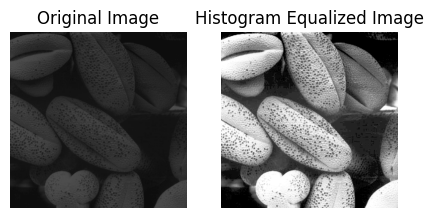

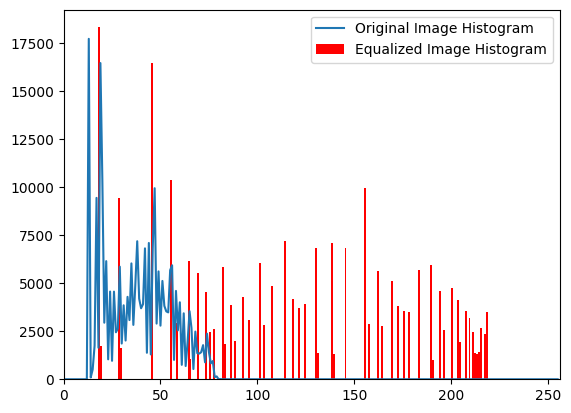

In [22]:
#question_05
img = cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1,2,figsize=(5,5))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_RGB2BGR))
ax[0].set_title("Original Image")
ax[0].axis("off")

rows = img.shape[0]
cols = img.shape[1]
arr1 = np.zeros((256,), dtype=np.uint16)
arr2 = np.zeros((256,), dtype=np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        arr1[g] += 1

for i in range(256):
    for j in range(i+1):
        arr2[i] += arr1[j]*(255/(rows*cols))
    arr2[i] = round(arr2[i],0)
arr2 = arr2.astype(np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        img[i,j] = arr2[g]

ax[1].imshow(img, cmap="gray"), ax[1].set_title("Histogram Equalized Image"), ax[1].axis("off"), plt.show()
plt.plot(arr1), plt.hist(img.flatten(),256,[0,256],color='r'), plt.legend(('Original Image Histogram','Equalized Image Histogram'),loc='upper right'), plt.xlim([0,256])
plt.show() 


In [23]:
#question_06

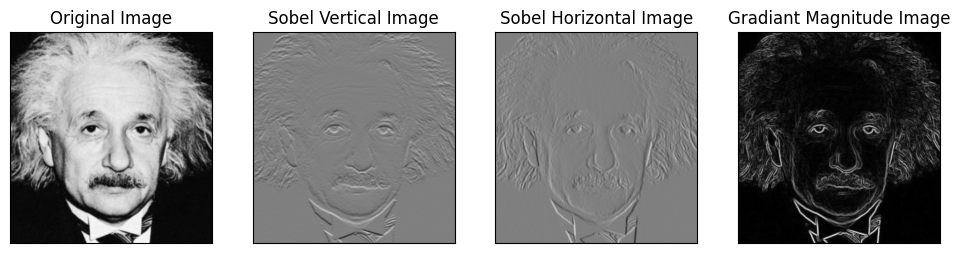

In [24]:
#question_07(a)

im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_v = np.array([(-1,-2,-1), (0,0,0), (1,2,1)], dtype='float')
sobel_h = np.array([(-1,0,1), (-2,0,2), (-1,0,1)], dtype='float')
imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)
grad_mag = np.sqrt(imv**2+imh**2)

fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255), axes[0].set_title('Original Image'), axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Vertical Image'), axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020), axes[2].set_title('Sobel Horizontal Image'), axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(grad_mag, cmap='gray'), axes[3].set_title('Gradiant Magnitude Image'), axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()

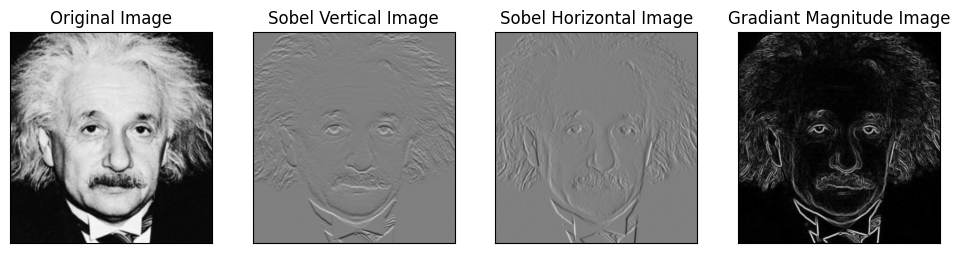

In [25]:
#question_07(b)
img = cv.imread("einstein.png")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float)
x_edge = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
y_edge = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
edge = np.sqrt(x_edge**2+y_edge**2)


fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255), axes[0].set_title('Original Image'), axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(y_edge, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Vertical Image'), axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(x_edge, cmap='gray', vmin=-1020, vmax=1020), axes[2].set_title('Sobel Horizontal Image'), axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(edge, cmap='gray'), axes[3].set_title('Gradiant Magnitude Image'), axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()


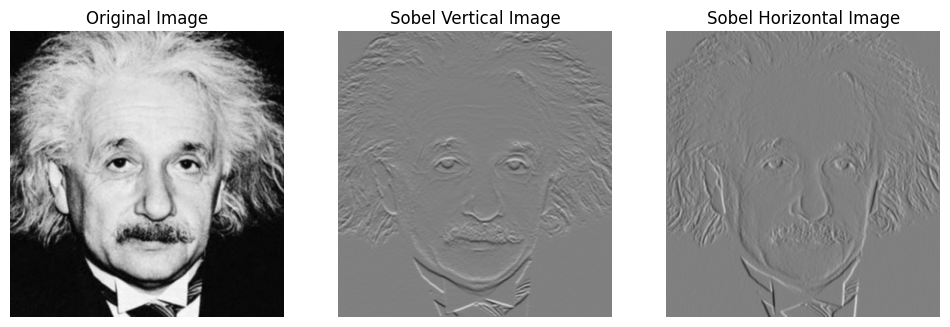

In [26]:
#question_07(c)
im = cv.imread("einstein.png")
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY).astype(float)
horizontal_kernel = np.array([1,2,1], dtype=np.float32)
vertical_kernel = np.array([1,0,-1], dtype=np.float32)
im1 = cv.sepFilter2D(im, -1, horizontal_kernel, vertical_kernel)
im2 = cv.sepFilter2D(im, -1, vertical_kernel, horizontal_kernel)

fig, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255), ax[0].set_title("Original Image"), ax[0].axis("off")
ax[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020), ax[1].set_title("Sobel Vertical Image"), ax[1].axis("off")
ax[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020), ax[2].set_title("Sobel Horizontal Image"), ax[2].axis("off")
plt.show()


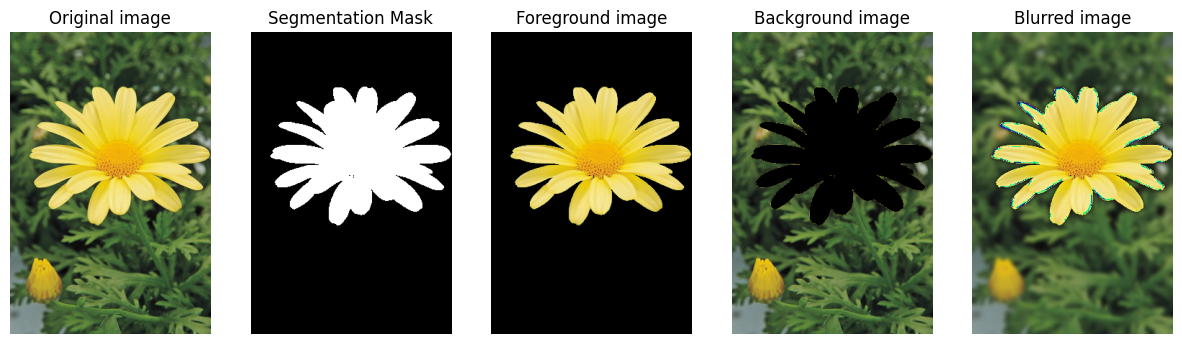

In [27]:
#question_09
img = cv.imread("daisy.png")
mask = np.zeros(img.shape[:2], np.uint8)

background_model = np.zeros((1,65), np.float64)
foreground_model = np.zeros((1,65), np.float64)
rect = (10,10,300,270)
cv.grabCut(img, mask, rect, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask_01 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_01 = img*mask_01[:,:,np.newaxis]

fig, ax = plt.subplots(1,5, figsize = (15,15))
ax[1].imshow(mask_01, cmap='gray'), ax[1].set_title("Segmentation Mask"), ax[0].axis("off")
ax[2].imshow(cv.cvtColor(img_01, cv.COLOR_BGR2RGB)), ax[2].set_title("Foreground image"), ax[1].axis("off")

cv.grabCut(img, mask, rect, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask_02 = np.where((mask==3)|(mask==1),0,1).astype('uint8')
img_02 = img*mask_02[:,:,np.newaxis]
ax[3].imshow(cv.cvtColor(img_02, cv.COLOR_BGR2RGB)), ax[3].set_title("Background image"), ax[2].axis("off")
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), ax[0].set_title("Original image"), ax[3].axis("off")
#09 (b).
blurred_img = img_01 + cv.GaussianBlur(img_02,(15,15),0)
ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB)), ax[4].set_title("Blurred image"), ax[4].axis("off")
plt.show()
